In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
# simple implementation of PCA algorithm on NumPy 2d-array
rng = np.random.RandomState(1)

X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
x = X.transpose()

In [8]:
def myPCA(x, n_components):
    centered_data = x - np.mean(x, axis=0)

    cov=np.cov(centered_data,rowvar=False)

    # eigendecomposition
    eigenval, eigenvect=np.linalg.eig(cov)

    #sort the eigenvalues in descending order
    sorted_index = np.argsort(eigenval)[::-1]

    sorted_eigenvalue = eigenval[sorted_index]
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigenvect[:,sorted_index]

    # select first n eigenvectors
    n_components=2
    eigenvector_subset=sorted_eigenvectors[:,0:n_components]

    # transform data
    X_reduced = np.dot(eigenvector_subset.transpose(),centered_data.transpose()).transpose()
    return X_reduced

print(myPCA(x,4).shape)
print(myPCA(x,4))

(2, 2)
[[ 3.99347839e+00+0.j  1.66533454e-16+0.j]
 [-3.99347839e+00+0.j -1.11022302e-16+0.j]]


In [12]:
###################################################
# simple option - use scikit-learn PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# rng = np.random.RandomState(1)

# X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
# print(X.shape)
# x = X.transpose()

x_scaled= StandardScaler().fit_transform(x)

pca=PCA(n_components=2)
pca_features=pca.fit_transform(x_scaled)

print("Before PCA: ", x_scaled.shape)
print("After PCA: ", pca_features.shape)

print(pca_features)

Before PCA:  (2, 200)
After PCA:  (2, 2)
[[ 1.41421356e+01  7.12210450e-15]
 [-1.41421356e+01  7.12210450e-15]]


In [27]:
import plotly.express as px
#sns.jointplot()
#pca_features.info()
df=pd.DataFrame.from_records(x)
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.625302,0.960695,-0.598543,-2.228059,-0.461430,-0.958929,-0.673080,1.305019,0.374546,-1.826286,...,0.451862,0.807369,-0.461251,-0.106359,-1.098103,0.838409,0.312708,1.955876,-1.108304,0.398647
1,-0.170064,0.590901,-0.402593,-0.532577,-0.498867,-0.269331,-0.338309,0.591358,-0.098544,-0.406170,...,-0.143503,0.144524,-0.308874,0.240026,-0.566249,0.278380,-0.010600,0.638224,-0.395054,0.023187


In [16]:
from sklearn import datasets
from sklearn import decomposition

digits=datasets.load_digits()
print(digits.data.shape)

x_digits, y_digits=digits.data, digits.target
print('DIGITS Dataset Size: ', x_digits.shape, y_digits.shape)

(1797, 64)
DIGITS Dataset Size:  (1797, 64) (1797,)


In [17]:
pca=decomposition.PCA(n_components=2)
pca.fit(x_digits)

X_digits_pca2=pca.transform(x_digits)
print('New Dataset size after transformations: ', X_digits_pca2.shape)

New Dataset size after transformations:  (1797, 2)


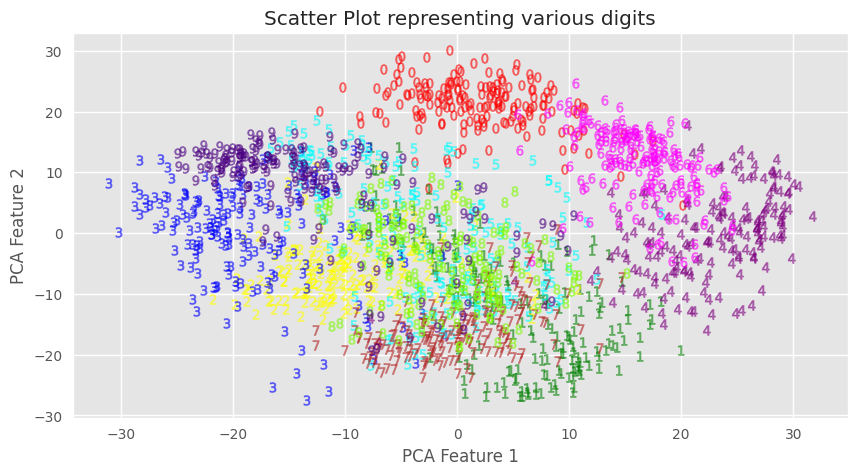

In [19]:
# reduced dataset visualisation
with plt.style.context(('seaborn','ggplot')):
    fig = plt.figure(1, figsize=(10, 5))

    colors = ['red','green','yellow','blue','purple','cyan','magenta', 'firebrick', 'lawngreen','indigo']
    for digit in range(0,10):
        plt.scatter(X_digits_pca2[y_digits==digit,0],X_digits_pca2[y_digits==digit,1], c = colors[digit], marker="$"+str(digit)+"$",s =50, alpha=0.5)
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.title('Scatter Plot representing various digits')